### Name : Sagar Surve

### Roll No. D21029

# Downloadng all required modules

In [1]:
!pip install nltk

In [2]:
!pip install gensim

In [5]:
!pip install wordcloud

In [9]:
!pip install plotly

In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Embedding,Input,LSTM,Conv1D,MaxPool1D,Bidirectional,Dropout
from tensorflow.keras.utils import to_categorical 

In [15]:
# Reading data
stock_df =pd.read_csv('stock_sentiment.csv')

In [16]:
stock_df.head() #1>Positve | 0>Negative

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [17]:
#Info of data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [18]:
# Chocking for null value
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
# There is no missing values

# Removing all punctuations

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# Lets define function to remove all punctuation in data
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join

In [21]:
# Lets remove punctuations in data by using above function
stock_df['Text without Punctuations']=stock_df['Text'].apply(remove_punc)

In [22]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                              Text without Punctuations  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

# Removing Stopwords

In [23]:
#download stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Lets define function to remove all stopwords and words with length than 3 in data\
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if len(token)>=3 and token not in stopwords.words('english'):
            result.append(token)
            
    return result
    

In [31]:
# Lets apply above function to all data
stock_df['Text Without Punc & Stopwords'] = stock_df['Text without Punctuations'].apply(preprocess)

In [32]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                              Text without Punctuations  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [user, aap, movie, return, feageed, indicator,...  
2     [user, afraid, short, amzn, looking, like, nea...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, day, high, points,...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

# Plot WordCloud

In [33]:
# for plotting wordcloud we have to join the words into strings
stock_df['Text Without Punc & Stopwords Joined']=stock_df['Text Without Punc & Stopwords'].apply(lambda x:" ".join(x))

In [34]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                              Text without Punctuations  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                          Text Without Punc & Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [user, aap, movie, return, feageed, indicator,...   
2     [user, afraid, short, amzn, looking, like, nea...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, day, high, points,...   
5790  [sensex, nifty, climb, days, highs, still, key...   

                   Text Without Punc & Stopwords Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1     user aap movie return feageed indicator trades...  
2     user afraid short amzn looking like nearmonopo...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex day high points nifty ...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

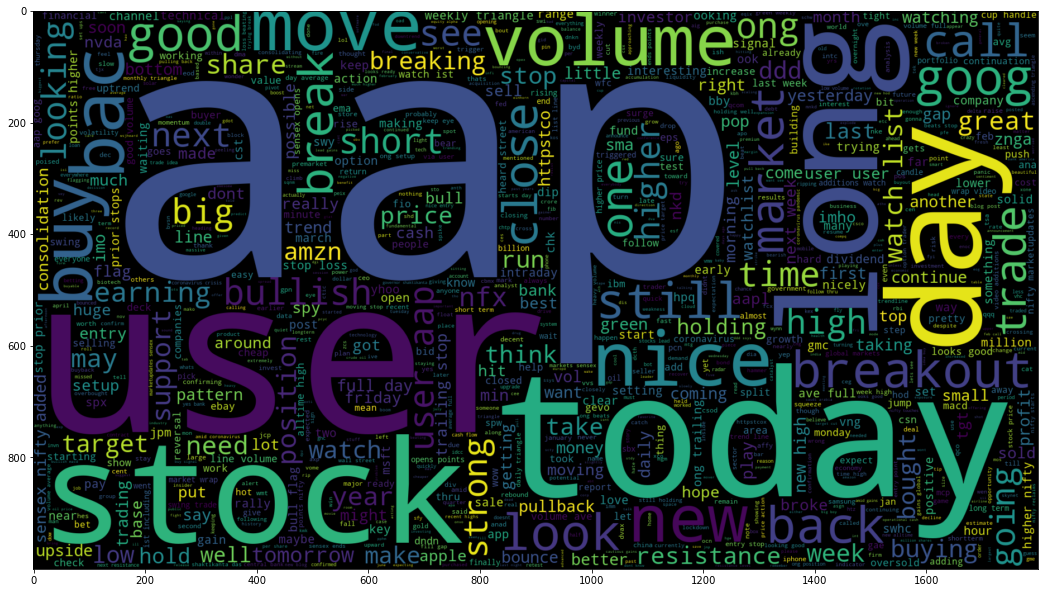

In [35]:
# Lets plot whe wordcloud with only positive sentiment
plt.figure(figsize=(18,18))
wc=WordCloud(max_words=1000,width=1800,height=1000).generate(" ".join(stock_df[stock_df.Sentiment==1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc,interpolation='bilinear')

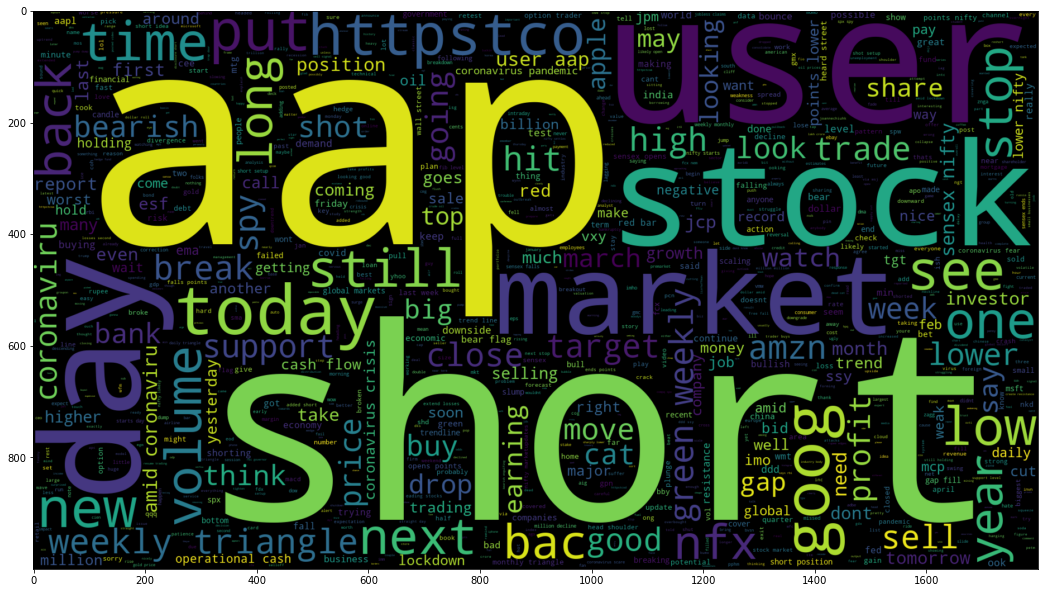

In [36]:
# Lets plot whe wordcloud with only negative sentiment
plt.figure(figsize=(18,18))
wc=WordCloud(max_words=1000,width=1800,height=1000).generate(" ".join(stock_df[stock_df.Sentiment==0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc,interpolation='bilinear')

# Visualization of Cleaned Dataset

In [37]:
#for visualisation lets convert sentences to words and calculate each rows words length
tweets_length = [len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined']]
tweets_length

[14,
 9,
 8,
 1,
 0,
 1,
 10,
 13,
 8,
 5,
 10,
 18,
 9,
 9,
 11,
 5,
 14,
 10,
 13,
 4,
 6,
 6,
 2,
 5,
 3,
 10,
 3,
 3,
 10,
 6,
 11,
 12,
 9,
 3,
 11,
 11,
 4,
 9,
 13,
 11,
 11,
 8,
 10,
 10,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 13,
 9,
 8,
 1,
 14,
 8,
 12,
 6,
 14,
 6,
 6,
 7,
 6,
 6,
 10,
 10,
 4,
 11,
 13,
 17,
 6,
 9,
 8,
 2,
 11,
 5,
 4,
 10,
 11,
 16,
 4,
 11,
 5,
 6,
 3,
 1,
 6,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 11,
 11,
 18,
 7,
 9,
 13,
 12,
 10,
 4,
 4,
 11,
 11,
 10,
 6,
 10,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 19,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 13,
 12,
 9,
 9,
 11,
 10,
 11,
 15,
 8,
 10,
 10,
 12,
 12,
 6,
 10,
 13,
 4,
 12,
 10,
 16,
 14,
 9,
 12,
 5,
 5,
 3,
 8,
 2,
 4,
 10,
 7,
 6,
 12,
 6,
 16,
 9,
 6,
 5,
 11,
 10,
 12,
 9,
 2,
 11,
 9,
 11,
 12,
 8,
 10,
 8,
 3,
 6,
 6,
 9,
 9,
 4,
 6,
 5,
 4,
 5,
 11,
 12,
 8,
 9,
 14,
 9,
 7,
 10,
 12,
 8,
 7,
 7,
 3,
 11,
 11,
 6,
 9,
 11,
 16,
 10,
 8,
 12,
 8,
 12,
 11,
 4,
 4,
 3,
 11,
 2,
 9,
 

In [38]:
# Lets calculate maximum length of words in each rows
maxlen=-100
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens=nltk.word_tokenize(doc)
    if maxlen<len(tokens):
        maxlen=len(tokens)
print("The maximum number of words in any document is: ",maxlen)

The maximum number of words in any document is:  20


In [39]:
# Lets use plotly library to see the distribution of words length
fig=px.histogram(x=tweets_length,nbins=50)
fig.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sentiment', ylabel='count'>

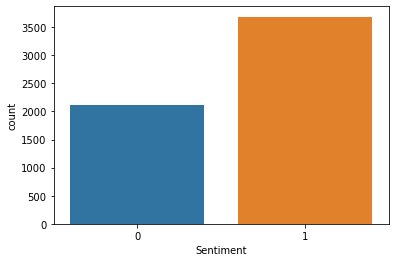

In [40]:
# Lets check in our dataset how many sentiments are positive and how many are negative
sns.countplot(stock_df['Sentiment'])

# Prepare the data by tokenizing and padding.

In [41]:
# Total words in dataset
list_of_words=[]
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [42]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'user',
 'aap',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'year',
 'awesome',
 'user',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'aap',
 'user',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'aap',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 '

In [43]:
len(list_of_words) #Total number of words in dataset

47742

In [52]:
total_words = len(set(list_of_words)) # total number of unique words in dataset
total_words

9277

In [48]:
# For applying LSTM we have to convert data into train and test
X=stock_df['Text Without Punc & Stopwords']
Y=stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [49]:
len(X_train),len(X_test)

(5211, 580)

In [50]:
X_train

2250                [green, weekly, triangle, pbyscaling]
2336    [still, taking, breather, still, first, suppor...
5398    [doctors, nurses, coming, retirement, help, co...
2536                                   [swy, added, long]
1111                                     [csx, ceo, cnbc]
                              ...                        
2896    [wbmd, box, like, box, best, chance, continued...
4186                [pay, ncertainty, never, good, thing]
2824    [fos, short, working, great, since, posting, y...
3771    [starter, position, shd, eady, hold, breadth, ...
217     [nvda, bounce, continues, stock, cleared, sma,...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [53]:
# Lets convert this above text into tokenizer
tokenizer=Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

#Test data
test_sequence = tokenizer.texts_to_sequences(X_test)

In [65]:
# Lets check how it is tokenized
X_train[1],train_sequences[1]

(['user',
  'aap',
  'movie',
  'return',
  'feageed',
  'indicator',
  'trades',
  'year',
  'awesome'],
 [15, 142, 1544, 15, 92, 41, 10, 981, 256])